# What is the correlation between latitude and wealth?

In [2]:
import pandas

World city geo-locations

In [3]:
geoCityData = pandas.read_csv('http://simplemaps.com/static/demos/resources/world-cities/world_cities.csv')

In [4]:
geoCityData 

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan
5,Zareh Sharan,Zareh Sharan,32.850000,68.416705,13737.0,Afghanistan,AF,AFG,Paktika
6,Asadabad,Asadabad,34.866000,71.150005,48400.0,Afghanistan,AF,AFG,Kunar
7,Taloqan,Taloqan,36.729999,69.540004,64256.0,Afghanistan,AF,AFG,Takhar
8,Mahmud-E Eraqi,Mahmud-E Eraqi,35.016696,69.333301,7407.0,Afghanistan,AF,AFG,Kapisa
9,Mehtar Lam,Mehtar Lam,34.650000,70.166701,17345.0,Afghanistan,AF,AFG,Laghman


read local gross domestic product csv file

In [5]:
cityGDP = pandas.read_csv('citiesGDP.csv')

In [6]:
cityGDP

,Rank,City/Urban area,Country,GDP in US$bn 2005
0,1,Tokyo,Japan,1191
1,2,New York,USA,1133
2,3,Los Angeles,USA,639
3,4,Chicago,USA,460
4,5,Paris,France,460
5,6,London,UK,452
6,7,Osaka/Kobe,Japan,341
7,8,Mexico City,Mexico,315
8,9,Philadelphia,USA,312
9,10,Washington DC,USA,299


In [23]:
cityGDP.keys()

Index(['Rank', 'City/Urban area', 'Country', 'GDP in US$bn 2005'], dtype='object')

In [122]:
import re
lats = []
gdp_per_capita = []
city_names = []
for index, row in cityGDP.iterrows():
    city, country, gdp = row[['City/Urban area', 'Country', 'GDP in US$bn 2005']]
    country = re.sub('UK', 'United Kingdom', country)
    country = re.sub('USA', 'United States Of America', country)
    # cities like London exist in more than one country
    data = geoCityData[(geoCityData['city'] == city) & (geoCityData['country'] == country)]
    if len(data.values) > 0:
        lat = data['lat'].values[0]
        pop = data['pop'].values[0]
        lats.append(lat)
        gdp_per_capita.append(1.e9 * gdp / pop)
        city_names.append(city)


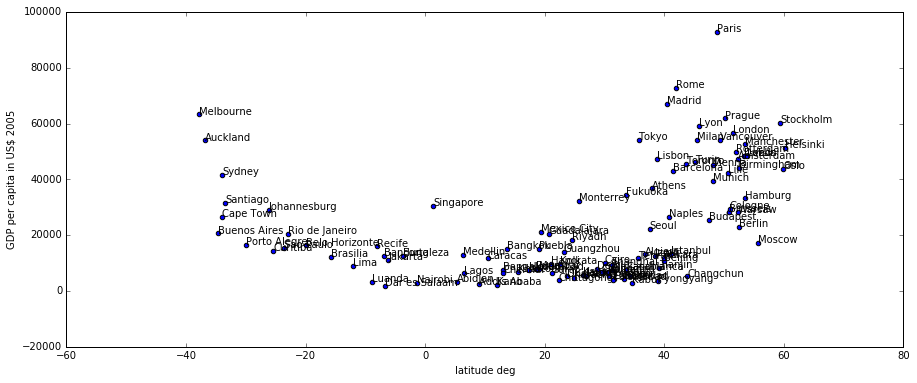

In [129]:
%matplotlib inline
from matplotlib import pyplot, pylab
pylab.rcParams['figure.figsize'] = (15, 6)
fig, ax = pyplot.subplots()
ax.scatter(lats, gdp_per_capita)
pyplot.xlabel('latitude deg')
pyplot.ylabel('GDP per capita in US$ 2005')
for i in range(len(lats)):
    ax.annotate(city_names[i], (lats[i], gdp_per_capita[i]))


In [131]:
cityGDP[cityGDP['City/Urban area'] == 'Paris']

,Rank,City/Urban area,Country,GDP in US$bn 2005
4,5,Paris,France,460


In [132]:
geoCityData[geoCityData['city'] == 'Paris']

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
2611,Paris,Paris,48.866693,2.333335,4957588.5,France,FR,FRA,Île-de-France


In [44]:
citiesGDPPerCapita = {}
for city in cityGDP['City/Urban area']:
    country = cityGDP[cityGDP['City/Urban area'] == city]['']
    gdpData = cityGDP[cityGDP['City/Urban area'] == city]['GDP in US$bn 2005'].values
    popData = geoCityData[geoCityData['city'] == city]['pop'].values
    if len(gdpData) > 0 and len(popData) > 0:
        gdp = gdpData[0]
        pop = popData[0]
        gdp_per_capita = 1.e9 * gdp/pop
        citiesGDPPerCapita[city] = gdp_per_capita
import operator
sortedCitiesGDPPerCapita = sorted(citiesGDPPerCapita.items(), key = operator.itemgetter(1), reverse = True)
print(sortedCitiesGDPPerCapita)
print

[('Portland', 8426558.1868371349), ('Los Angeles', 4721634.1731044194), ('London', 1325902.0240539748), ('Boston', 114711.99082462298), ('Minneapolis', 103895.30302740859), ('Seattle', 102103.30054408434), ('Atlanta', 95761.576397855271), ('Paris', 92787.047573633841), ('Philadelphia', 89021.406509690351), ('New York', 83776.128003416699), ('Detroit', 80359.91742325727), ('San Diego', 78924.135077883417), ('Chicago', 77755.555465404192), ('Miami', 77414.243617597764), ('Cleveland', 76939.056573288297), ('Baltimore', 76764.930430037144), ('Rome', 72900.725806738395), ('Denver', 67329.621744774646), ('Madrid', 66934.440030213067), ('Phoenix', 64038.817375455277), ('Melbourne', 63326.394793163097), ('Prague', 61851.047215543171), ('Stockholm', 60381.939602964914), ('Lyon', 59093.017157552007), ('Houston', 57977.636421995281), ('Vancouver', 54168.395141300658), ('Tokyo', 54120.86661821539), ('Milan', 54096.50487186067), ('Auckland', 53982.172716619927), ('Manchester', 52561.116580937451), 

In [45]:
cityGDP[cityGDP['City/Urban area'] == 'Portland']

,Rank,City/Urban area,Country,GDP in US$bn 2005
56,57,Portland,USA,87


In [49]:
geoCityData[geoCityData['city'] == 'Portland']

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
574,Portland,Portland,-38.340000,141.590003,10324.5,Australia,AU,AUS,Victoria
6946,Portland,Portland,43.672162,-70.245527,99504.0,United States of America,US,USA,Maine
7022,Portland,Portland,45.520024,-122.679990,1207756.5,United States of America,US,USA,Oregon


In [54]:
geoCityData[geoCityData['city'] == 'Los Angeles']

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
1660,Los Angeles,Los Angeles,-37.460002,-72.359987,135334.5,Chile,CL,CHL,Bío-Bío
7069,Los Angeles,Los Angeles,33.989978,-118.179980,8097410.0,United States of America,US,USA,California
